In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option("display.max_column",None)
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\statistics\\hypothesis\\insurance.csv")

In [11]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# remove ID as it is not going to be in our model
#YOU NEED TO KEEP ONLY SELECTED VARIABLES WITH TARGET VARIABLE.

# TRAIN AND TEST

In [14]:
trn = data.iloc[0:1000,]
tst = data.iloc[1000:1338,]

In [15]:
# now build the model on trn set only

In [16]:
model_1 = smf.ols(formula = "charges ~ age + sex + bmi + children + smoker + region", data = trn).fit()

In [17]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     385.7
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          4.13e-298
Time:                        01:32:53   Log-Likelihood:                -10103.
No. Observations:                1000   AIC:                         2.022e+04
Df Residuals:                     991   BIC:                         2.027e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.208e+04   1

In [18]:
# make two set of test data
# where one only have predictors and another which have only target

In [20]:
x_tst = tst.iloc[:,tst.columns != "charges"] # only predictors
y_tst = tst.iloc[:,tst.columns == "charges"] # only target column

In [21]:
# apply your model on x_tst on and find predictions
pred_1 = model_1.predict(x_tst)

In [24]:
# residuals
# y tst is in DataFrame we need to convert it into series

In [27]:
y_tst

,charges
1000,17361.76610
1001,34472.84100
1002,1972.95000
1003,21232.18226
1004,8627.54110
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [30]:
y_tst_series = y_tst.iloc[:, 0] # the first column in the DataFrame # THIS STEP IS IMPORTANT
# now you can find residuals
resd_1 = y_tst_series - pred_1

# RMSE : The Final Verdict

In [32]:
# RMSE root mean squared error
# first square the errors/residuals
se_1 = resd_1.pow(2)
se_1

1000    1.044821e+08
1001    4.648771e+07
1002    2.460626e+05
1003    1.469289e+08
1004    2.709666e+06
            ...     
1333    2.428492e+06
1334    1.735265e+06
1335    5.188835e+06
1336    1.071812e+06
1337    6.672880e+07
Length: 338, dtype: float64

In [33]:
# second sum the squared errors/residuals
sse_1 = se_1.sum()
sse_1

14030528909.308918

In [34]:
# third divide by number of data points
msse_1 = sse_1/len(se_1)
msse_1

41510440.56008556

In [35]:
# fourth the last one take the square root
import math # need to import this library
math.sqrt(msse_1)

6442.8596570223035

# PLOT

In [37]:
obsno = np.arange(0,338,1)
obsno

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

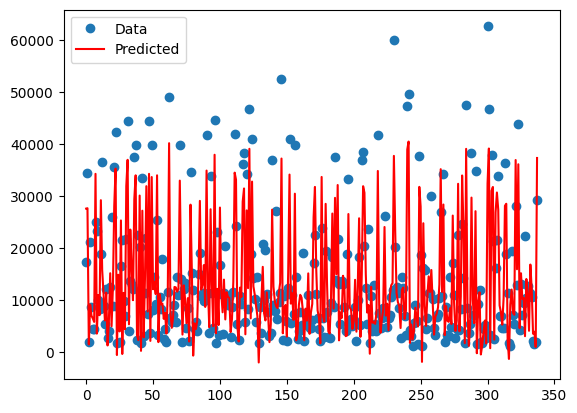

In [38]:
fig, ax = plt.subplots()
ax.plot(obsno, y_tst_series, "o", label="Data")
ax.plot(obsno, pred_1, "r-", label="Predicted")
ax.legend(loc="best")

In [41]:
# Correlation matrix or heatmap
# first collect all the continous variables in a DataFrame
hm = data.iloc[:,[0,2,3,6]]
print(hm.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

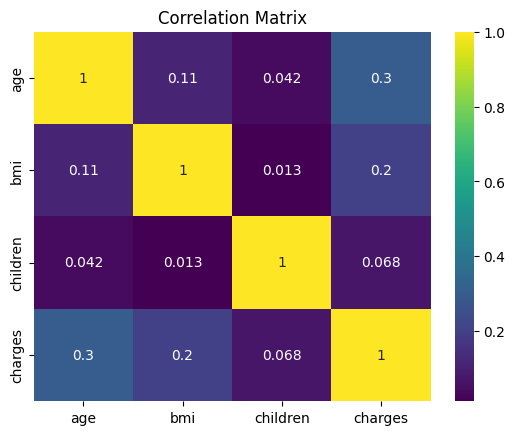

In [42]:
# plotting correlation heatmap
sns.heatmap(hm.corr(),cmap="viridis",annot = True)
plt.title("Correlation Matrix")

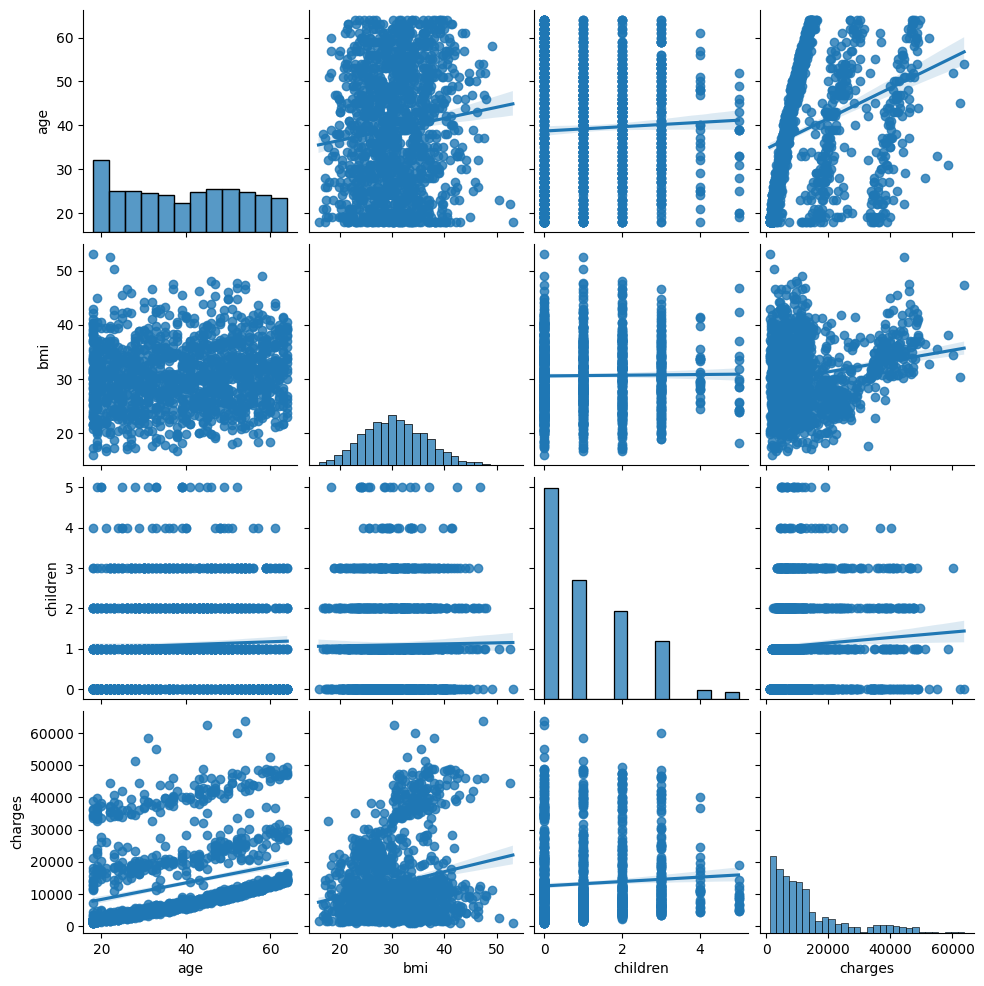

In [43]:
# simple pair plot
sns.pairplot(hm,kind = "reg")

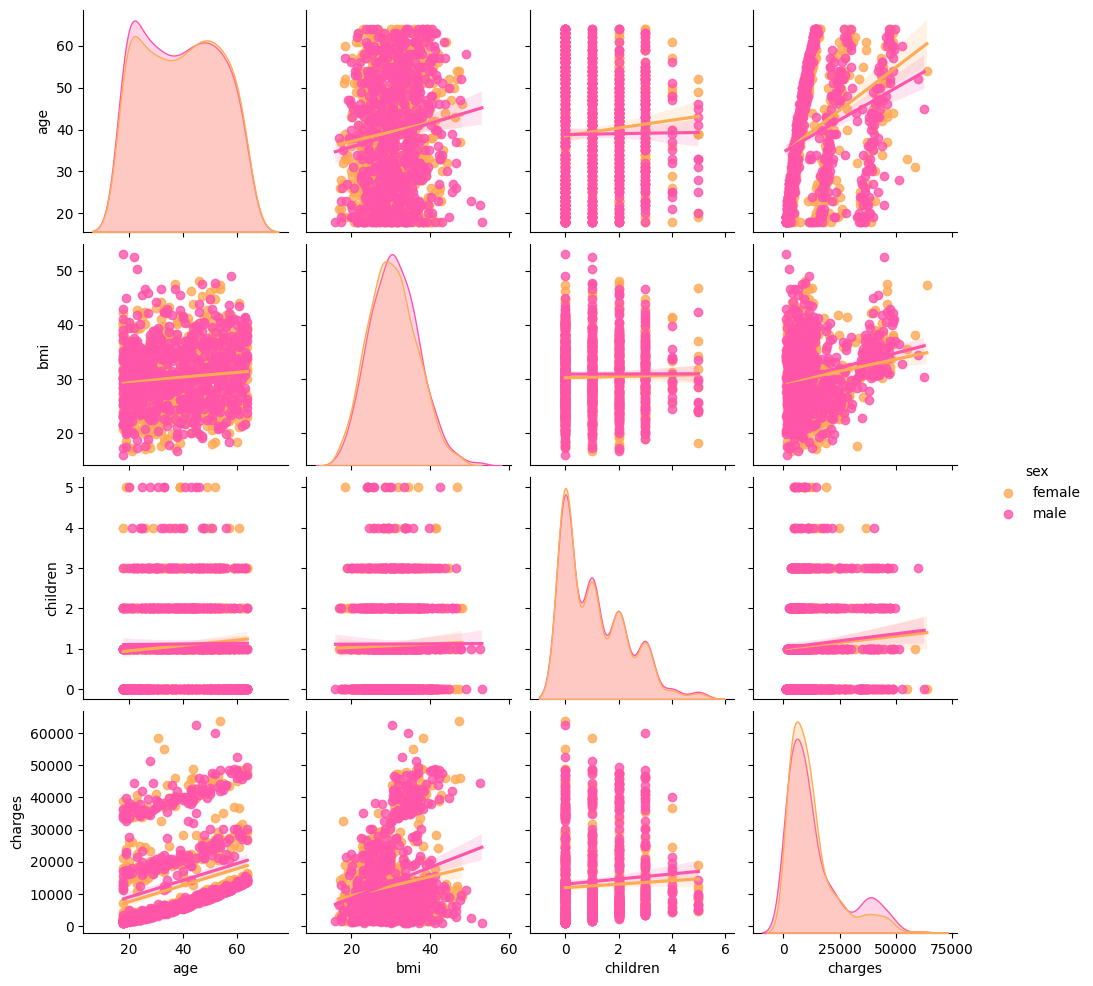

In [45]:
# pair plot using HUE by cat var, say sex
pp = data.iloc[:,[0,2,3,6,1]]
sns.pairplot(pp,hue = "sex", kind = "reg", palette = "spring_r" )